### 1 IMPORT LIBRARIES , MobileNetV2, AND SPECIFY NEURAL LAYERS

In [1]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os


        #INITIALISE PARAMETERS

# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3
EPOCHS = 1
BS = 2

        #LOAD IMAGES FROM DIRECTORY
    
DIRECTORY = r"C:\Users\admin\Desktop\1.TOTORIAL\PRACTICE new\projects\vision project\complexion"
CATEGORIES = ["black", "white","yellow"]

# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")

data = []
labels = []


        #CONVERT IMAGES TO ARRAY
    
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)

        data.append(image)
        labels.append(category)
        #print (data)
        
        #ONE HOT ENCODE LABELS
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
#labels = to_categorical(labels)

data = np.array(data, dtype="float32")
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels,
    test_size=0.50, stratify=labels, random_state=42)


        #TRAINING IMAGE GENERATOR

# construct the training image generator for data augmentation
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")


        #USING MobileNetV2 NEURAL network TO TRAIN
    
# load the MobileNetV2 network, ensuring the head FC layer sets are
# left off
baseModel = MobileNetV2(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(3, activation="softmax")(headModel)

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
    layer.trainable = False

    
   

[INFO] loading images...


### 2. PLOT SOME IMAGES

Found 200 files belonging to 3 classes.
['black', 'white', 'yellow']


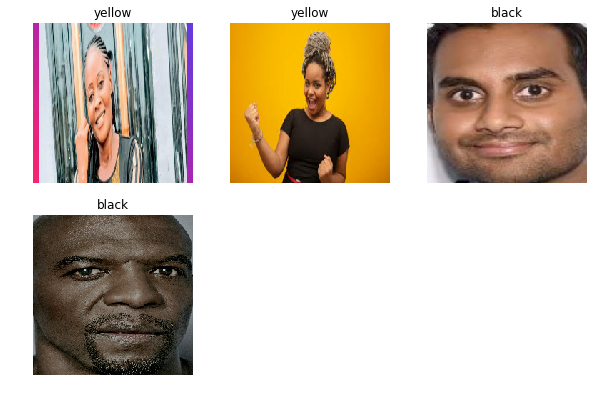

In [2]:
import tensorflow as tf 
import matplotlib.pyplot as plt
img_height = 224
img_width = 224
batch_size = 128


train_ds = tf.keras.preprocessing.image_dataset_from_directory('C:/Users/admin/Desktop/1.TOTORIAL/PRACTICE new/projects/vision project/complexion - Copy/train',
  seed=111,
  image_size=(img_height, img_width),
  batch_size=batch_size)
classes=train_ds.class_names
print(classes)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(4):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classes[labels[i]])
    plt.axis("off")

### 3. TRAIN USING KERAS CONVULUTIONARY NEURAL NETWORK AND SAVE TRAINED MODEL

[INFO] compiling model...
[INFO] training head...


C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
50/50 [==============================] - 26s 326ms/step - loss: 0.4600 - accuracy: 0.7400 - val_loss: 0.3355 - val_accuracy: 0.8200
Epoch 2/10
50/50 [==============================] - 9s 186ms/step - loss: 0.4078 - accuracy: 0.6900 - val_loss: 0.4001 - val_accuracy: 0.7300
Epoch 3/10
50/50 [==============================] - 9s 187ms/step - loss: 0.4259 - accuracy: 0.7300 - val_loss: 0.3221 - val_accuracy: 0.7900
Epoch 4/10
50/50 [==============================] - 9s 184ms/step - loss: 0.3647 - accuracy: 0.7600 - val_loss: 0.3252 - val_accuracy: 0.7600
Epoch 5/10
50/50 [==============================] - 10s 193ms/step - loss: 0.3920 - accuracy: 0.7000 - val_loss: 0.3094 - val_accuracy: 0.8300
Epoch 6/10
50/50 [==============================] - 11s 220ms/step - loss: 0.2697 - accuracy: 0.8600 - val_loss: 0.3561 - val_accuracy: 0.7800
Epoch 7/10
50/50 [==============================] - 11s 217ms/step - loss: 0.3233 - accuracy: 0.7800 - val_loss: 0.2834 - val_accuracy: 0.8100
Ep

C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


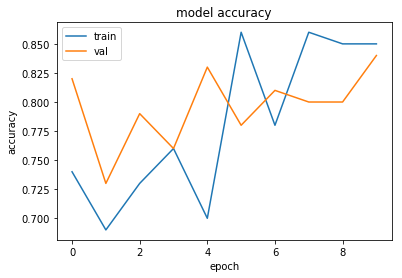

In [7]:
 
        #COMPILE MODEL
        
EPOCHS = 10

# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
    metrics=["accuracy"])

# train the head of the network
print("[INFO] training head...")
H = model.fit(
    aug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS)

# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)


# serialize the model to disk
print("[INFO] saving complexion detector model...")
model.save("complexion4.model", save_format="h5")

#plot training accuracy vs validation accuracy
from matplotlib import pyplot as plt
history = H
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


### 4. EVALUATE TRAINED MODEL WITH CONFUSION MATRIX

In [8]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(testY.argmax(axis=1),predIdxs)
print (CM)

[[30  2  1]
 [ 3 31  0]
 [ 2  8 23]]


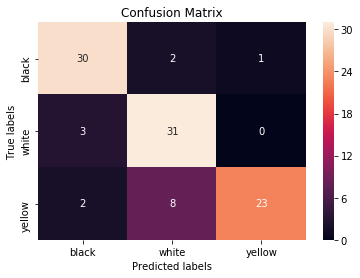

In [9]:
#### TO test on another data
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(CM,annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['black', 'white', 'yellow']); ax.yaxis.set_ticklabels(['black', 'white', 'yellow']);

In [10]:
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
    target_names=lb.classes_))

              precision    recall  f1-score   support

       black       0.86      0.91      0.88        33
       white       0.76      0.91      0.83        34
      yellow       0.96      0.70      0.81        33

    accuracy                           0.84       100
   macro avg       0.86      0.84      0.84       100
weighted avg       0.86      0.84      0.84       100

